In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',family='Times New Roman')
a = 'C:/Users/46685/Desktop/科研数据/数据汇总/新建处理后后逻辑回归1.xlsx'
dataset= pd.read_excel(a,sheet_name = 'Sheet1')
dataset.head() #显示前几排数据

,Age,BMI,Waist,GLU,UA,TC,TG,HDL,LDL,PGI,PGII,CA724,SBP,DBP,Smoking,Drinker,Sex,CAS
0,42,22.06,76,4.72,494,4.17,1.09,1.60,1.94,157.23,29.65,0.23,84,57,0,0,1,0
1,39,23.91,78,5.13,382,4.49,2.17,1.14,2.32,92.39,15.59,1.33,107,71,0,0,1,0
2,56,23.26,72,5.39,381,5.57,1.67,1.47,3.09,87.26,20.89,26.78,131,79,0,0,0,0
3,53,23.27,73,6.10,412,6.37,2.34,1.34,3.70,14.60,12.85,0.20,131,78,0,0,0,1
4,48,18.75,63,5.38,393,3.86,0.88,1.73,1.73,45.12,5.54,14.97,94,64,0,0,0,0


In [2]:
x=dataset.iloc[:,0:16]
y=dataset.iloc[:,17]
print(x)
print(y)

     Age    BMI  Waist   GLU   UA    TC    TG   HDL   LDL     PGI   PGII  \
0     42  22.06     76  4.72  494  4.17  1.09  1.60  1.94  157.23  29.65   
1     39  23.91     78  5.13  382  4.49  2.17  1.14  2.32   92.39  15.59   
2     56  23.26     72  5.39  381  5.57  1.67  1.47  3.09   87.26  20.89   
3     53  23.27     73  6.10  412  6.37  2.34  1.34  3.70   14.60  12.85   
4     48  18.75     63  5.38  393  3.86  0.88  1.73  1.73   45.12   5.54   
..   ...    ...    ...   ...  ...   ...   ...   ...   ...     ...    ...   
145   63  23.76     75  6.14  383  6.77  0.49  2.80  2.76   52.43   6.92   
146   46  19.29     75  5.32  244  6.06  2.92  1.22  3.17   57.87   6.45   
147   32  25.23     88  5.53  591  6.19  3.31  1.43  3.56   54.30   5.60   
148   72  25.99     85  8.40  438  4.19  0.86  1.85  1.58  110.10  10.81   
149   40  22.25     82  5.53  459  4.94  2.15  1.33  2.33   39.44   4.63   

     CA724  SBP  DBP  Smoking  Drinker  
0     0.23   84   57        0        0  
1    

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtree.fit(x_train,y_train)
y_predict = dtree.predict(x_test)
from sklearn.tree import plot_tree

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))        # 输出相关结果的函数



              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.40      0.40      0.40         5

    accuracy                           0.80        30
   macro avg       0.64      0.64      0.64        30
weighted avg       0.80      0.80      0.80        30



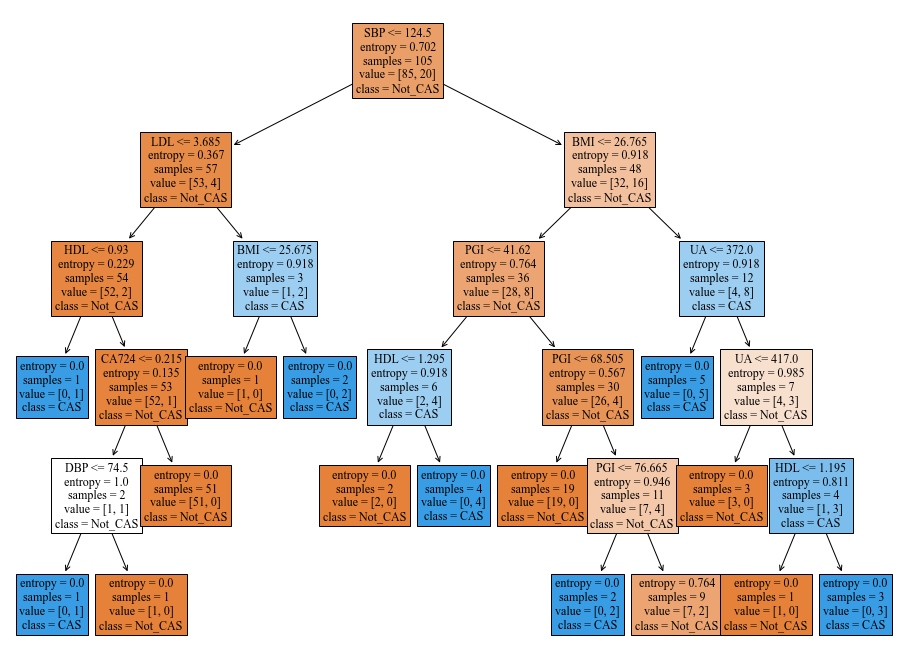

In [22]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=x.columns, fontsize=12, filled=True, 
              class_names=['Not_CAS', 'CAS'])

(3,) (3,) (3,)


<Figure size 432x288 with 0 Axes>

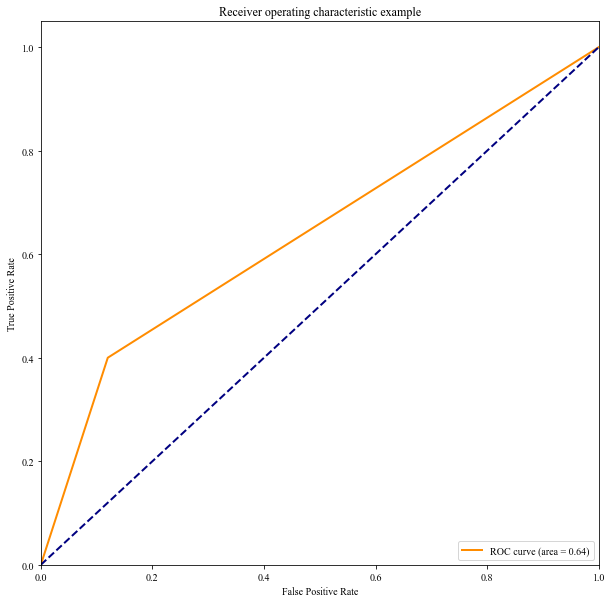

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr,tpr,threshold = roc_curve(y_predict,y_test) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print(fpr.shape, tpr.shape, threshold.shape)


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()